 ## Setting up a business in Santiago (Chile)

## 1- Problem

How to determinate the best option for a premium local business in Santiago.


 ## 1.2- Client requirements:

1-	Client would like to run a premium local business (venue), at least in the beginning, so she is looking for a rich borough with high population density. 

2-	Client is looking for a the highest venue frequency because it means more demand, and she wants to capture that demand by using innovative strategies.   

3-	After decided the type and location of the business, client wants to get tips from her competitors clients in order to consider their strengths and improve their weaknesses.


## 2-Data explanation

1-	In order to obtain a rich borough with high population density, the information (table) will be extracted from https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile. It will be necessary just the following columns: Borough (“Comuna”), Population Density (“Densidad Poblacional”) and poverty rate (“Pobreza”). After getting and cleaning the information, a pandas data frame will be created. 

2-	It will be necessary to create a plot (Bar) by using matplot in order to visualize the relation between population density and poverty rate for each borough. Then, one borough will be recommended. 

3-	Then Foursquare api will be used to extract information of the borough and determine the top category according their frequency.

4-	After determine the most common venue, it will be necessary to get at least 5 venues with ranking over 7.0 and get 2 tips for each one (because of the Foursquare account limitation). 

5-	Finally, a table with the name of the venues and tips will be created.

6-	Conclusions will include aspects that is necessary to imitate and other that should be improved in order to create the best local business in the borough. 


## 3- Data colection and analizis 

In [47]:
import requests
import pandas as pd
import wikipedia as wp
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim 
import json
from pandas.io.json import json_normalize

In [48]:

url = "https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile"
df = pd.read_html(url)[3]
df.to_csv('Santiago.csv')




In [49]:
df=df.drop(['Ubicación?', 'Viviendas (2002)?', 'Crecimiento demográfico (2002-2017)?', 'ICVU (2018)?'], axis=1)
df=df.rename(columns = {'Comuna':'Borough', 'Población (2017)?':'Population', 'Densidad poblacional (2002) ?': 'Population Density', 'Pobreza (2006)?': 'Poverty Rate'})
df['Population'] = df.Population.astype(int)
df=df.round(2)
df

,Borough,Population,Population Density,Poverty Rate
0,Cerrillos,80832,4329.08,8.3
1,Cerro Navia,132622,13482.91,17.5
2,Conchalí,126955,12070.29,8.0
3,El Bosque,162505,12270.72,15.8
4,Estación Central,147041,9036.31,7.3
5,Huechuraba,98671,3493.87,14.5
6,Independencia,100281,8824.66,6.0
7,La Cisterna,90119,8477.89,8.6
8,La Florida,366916,9356.62,9.6
9,La Granja,116571,13212.36,14.2


In [50]:
df=df.sort_values('Population Density').reset_index(drop=True)
df

,Borough,Population,Population Density,Poverty Rate
0,Lo Barnechea,105833,1318.22,8.1
1,Las Condes,294838,2519.84,2.3
2,Vitacura,85384,2846.63,4.4
3,Quilicura,210410,3254.11,6.7
4,Huechuraba,98671,3493.87,14.5
5,Peñalolén,241599,3970.96,8.7
6,La Reina,92787,4077.62,7.8
7,Cerrillos,80832,4329.08,8.3
8,San Bernardo,297262,4605.85,20.9
9,Padre Hurtado,63250,4616.85,18.7


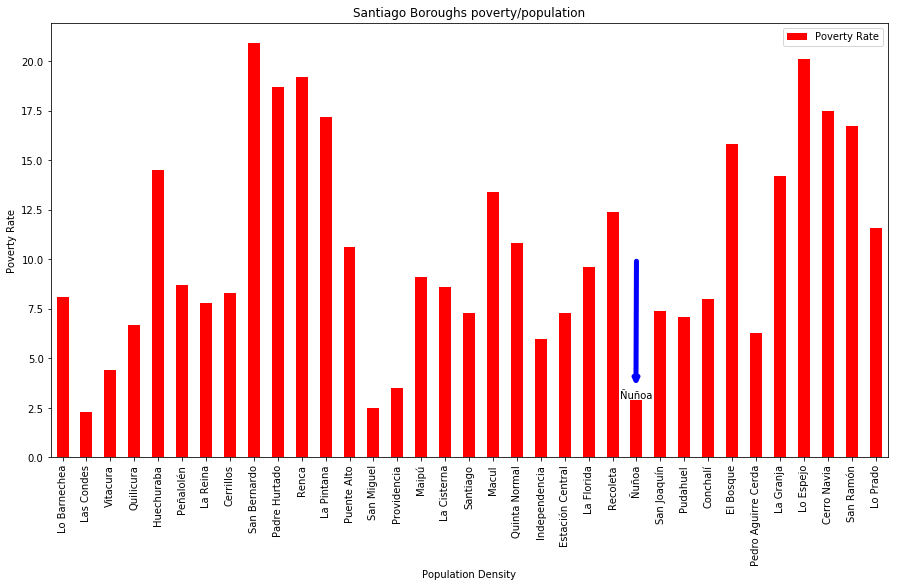

In [51]:

ax=df.plot(kind='bar', x='Borough', y='Poverty Rate', figsize=(15, 8), color='red')

ax.set_title('Santiago Boroughs poverty/population')
ax.set_xlabel("Population Density")
ax.set_ylabel("Poverty Rate")

plt.annotate('Ñuñoa',                      
             xy=(24, 10),             
             xytext=(23.3, 3),        
             xycoords='data',         
             arrowprops=dict(arrowstyle='<-', connectionstyle='arc3', color='blue', lw=5)
            )


plt.show()



In [52]:
address = 'Ñuñoa'

geolocator = Nominatim(user_agent="nu_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ñuñoa are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ñuñoa are -33.4543199, -70.6005935319396.


In [53]:
CLIENT_ID = 'IJXOFIL2KE04MRKQBTMRXU24GNCYASEQ45NG33LJEJMJO21B' # your Foursquare ID
CLIENT_SECRET = 'R02KX15ZH0RQBHM5Y4QFCJDEOIXNORHQN2XUBICPLO4OWBLR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IJXOFIL2KE04MRKQBTMRXU24GNCYASEQ45NG33LJEJMJO21B
CLIENT_SECRET:R02KX15ZH0RQBHM5Y4QFCJDEOIXNORHQN2XUBICPLO4OWBLR


In [62]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c8d5e4f1ed219672fe2b864'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ñuñoa',
  'headerFullLocation': 'Ñuñoa, Santiago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 117,
  'suggestedBounds': {'ne': {'lat': -33.44531989099999,
    'lng': -70.58982650649226},
   'sw': {'lat': -33.46331990900001, 'lng': -70.61136055738693}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '567857d2498eae14f34e98ad',
       'name': 'Gustapan',
       'location': {'address': 'Av. Irarrázaval',
        'lat': -33.45421226508456,
        'lng': -70.60219223442685,
        'labeledLatLngs': [{'label': 'display',
          'lat': -33.45421226508

In [63]:

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=IJXOFIL2KE04MRKQBTMRXU24GNCYASEQ45NG33LJEJMJO21B&client_secret=R02KX15ZH0RQBHM5Y4QFCJDEOIXNORHQN2XUBICPLO4OWBLR&v=20180605&ll=-33.4543199,-70.6005935319396&radius=1000&limit=100'

In [66]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [67]:
venues = results['response']['groups'][0]['items']
    
nunoa_venues = json_normalize(venues) 

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.id']
nunoa_venues =nunoa_venues.loc[:, filtered_columns]

# filter the category for each row
nunoa_venues['venue.categories'] = nunoa_venues.apply(get_category_type, axis=1)

# clean columns
nunoa_venues.columns = [col.split(".")[-1] for col in nunoa_venues.columns]

nunoa_venues.head(100)

,name,categories,lat,lng,id
0,Gustapan,Bakery,-33.454212,-70.602192,567857d2498eae14f34e98ad
1,Café Pushkin,Coffee Shop,-33.452400,-70.602325,57003913498e13497d7af98e
2,Fuente Suiza,Sandwich Place,-33.455259,-70.596011,4b5884e3f964a520c55b28e3
3,HBH,Beer Bar,-33.454691,-70.597956,4b638629f964a520c3802ae3
4,Golfo di Napoli,Italian Restaurant,-33.455821,-70.605702,4b5b3354f964a520a8ea28e3
5,AutoPlanet,Auto Workshop,-33.456152,-70.597958,56db1a97498e865410ab4215
6,Panatura,Vegetarian / Vegan Restaurant,-33.455018,-70.597072,5692d6d0498eb438cda32287
7,Sajj Comida Árabe,Middle Eastern Restaurant,-33.455166,-70.596513,55457d48498e6f518bcbcfde
8,Mr. Fish,Fish & Chips Shop,-33.455130,-70.597104,50dc7ba4e4b0add0e0f67972
9,Perú Mágico,South American Restaurant,-33.453090,-70.604861,4b65f3a4f964a5209f0a2be3


In [68]:
print('{} venues were returned by Foursquare.'.format(nunoa_venues.shape[0]))

100 venues were returned by Foursquare.


In [69]:
map_nunoa = folium.Map(location=[latitude, longitude], zoom_start=15)
# add a red circle marker to represent the BEDOKVILLE
folium.features.CircleMarker(
    [latitude,longitude],
    radius=260,
    color='red',
    popup='ÑUÑOA',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_nunoa)
# add all venues as blue circle markers
for lat, lng, label in zip(nunoa_venues.lat, nunoa_venues.lng, nunoa_venues.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_nunoa)

map_nunoa

In [70]:
nunoa_onehot = pd.get_dummies(nunoa_venues[['categories']], prefix="", prefix_sep="")
nunoa_onehot

,Arts & Entertainment,Auto Workshop,Bakery,Bar,Beer Bar,Boutique,Brazilian Restaurant,Burger Joint,Café,Cheese Shop,...,Soccer Field,South American Restaurant,Spa,Sporting Goods Shop,Sushi Restaurant,Swiss Restaurant,Theater,Vegetarian / Vegan Restaurant,Wine Bar,Yoga Studio
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [71]:

nunoa_grouped = nunoa_onehot.mean().reset_index() 
nunoa_grouped=nunoa_grouped.rename(columns = {'index':'Category', 0:'Frequency'})
nunoa_grouped=nunoa_grouped.sort_values('Frequency', ascending=False).reset_index(drop=True)
nunoa_grouped['Top Venues'] = (range(1, len(nunoa_grouped) + 1))
nunoa_grouped.reset_index(drop=True, inplace=True)
nunoa_grouped=nunoa_grouped.reindex(columns=['Top Venues']+nunoa_grouped.columns[:-1].tolist())

nunoa_grouped.head(10)

,Top Venues,Category,Frequency
0,1,Bakery,0.09
1,2,Bar,0.06
2,3,Restaurant,0.05
3,4,Chinese Restaurant,0.04
4,5,Pet Store,0.03
5,6,Italian Restaurant,0.03
6,7,Pizza Place,0.03
7,8,Plaza,0.03
8,9,Sushi Restaurant,0.03
9,10,Farmers Market,0.02


In [72]:
nunoa_onehot.groupby('Bakery').size()

Bakery
0    91
1    9 
dtype: int64

In [73]:
nunoa_venues=nunoa_venues.rename(columns = {'name':'Venue Name', 'categories':'Category', 'lat': 'Venue Latitude', 'lng': 'Venue Longitude'})
nunoa_venues=nunoa_venues.sort_values('Category').reset_index(drop=True)
nunoa_venues=nunoa_venues.drop(nunoa_venues.index[[0,1]])
nunoa_venues.head(20)

,Venue Name,Category,Venue Latitude,Venue Longitude,id
2,Gustapan,Bakery,-33.454212,-70.602192,567857d2498eae14f34e98ad
3,Monti,Bakery,-33.446100,-70.596311,4fdcaea5e4b0b19232e987b7
4,La Espiga,Bakery,-33.446314,-70.597143,4bb7ac8e53649c74fc1446fb
5,Doña Isidora,Bakery,-33.460360,-70.606084,4cc9efac0a9ab1f7ee7818f4
6,il castello,Bakery,-33.448366,-70.602762,52854a2811d222ec5ff845b2
7,Pastelería Pom Pan,Bakery,-33.449253,-70.597184,4c0e848a336220a1d357cc77
8,Pasteles Orientales,Bakery,-33.453811,-70.603400,4de98f29814d76ba5401cb6b
9,Pastelería Mozart,Bakery,-33.450508,-70.605377,4bd34a4ab221c9b6ba5fd9d0
10,Panaderia Oriente,Bakery,-33.446550,-70.600980,4b6afe18f964a52038eb2be3
11,Bar The Clinic,Bar,-33.454466,-70.594196,5103e50ce4b0f0740f23e239


In [74]:
nunoa_venues=nunoa_venues.drop(nunoa_venues.index[9:99])
nunoa_bakery=nunoa_venues.reset_index(drop=True)
nunoa_bakery

,Venue Name,Category,Venue Latitude,Venue Longitude,id
0,Gustapan,Bakery,-33.454212,-70.602192,567857d2498eae14f34e98ad
1,Monti,Bakery,-33.446100,-70.596311,4fdcaea5e4b0b19232e987b7
2,La Espiga,Bakery,-33.446314,-70.597143,4bb7ac8e53649c74fc1446fb
3,Doña Isidora,Bakery,-33.460360,-70.606084,4cc9efac0a9ab1f7ee7818f4
4,il castello,Bakery,-33.448366,-70.602762,52854a2811d222ec5ff845b2
5,Pastelería Pom Pan,Bakery,-33.449253,-70.597184,4c0e848a336220a1d357cc77
6,Pasteles Orientales,Bakery,-33.453811,-70.603400,4de98f29814d76ba5401cb6b
7,Pastelería Mozart,Bakery,-33.450508,-70.605377,4bd34a4ab221c9b6ba5fd9d0
8,Panaderia Oriente,Bakery,-33.446550,-70.600980,4b6afe18f964a52038eb2be3


In [75]:
nunoa_bakery=nunoa_bakery.drop(['Venue Latitude', 'Venue Longitude'], axis=1)
nunoa_bakery


,Venue Name,Category,id
0,Gustapan,Bakery,567857d2498eae14f34e98ad
1,Monti,Bakery,4fdcaea5e4b0b19232e987b7
2,La Espiga,Bakery,4bb7ac8e53649c74fc1446fb
3,Doña Isidora,Bakery,4cc9efac0a9ab1f7ee7818f4
4,il castello,Bakery,52854a2811d222ec5ff845b2
5,Pastelería Pom Pan,Bakery,4c0e848a336220a1d357cc77
6,Pasteles Orientales,Bakery,4de98f29814d76ba5401cb6b
7,Pastelería Mozart,Bakery,4bd34a4ab221c9b6ba5fd9d0
8,Panaderia Oriente,Bakery,4b6afe18f964a52038eb2be3


In [76]:
venue_id = '567857d2498eae14f34e98ad'
venue_name= 'Gustapan'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('The ranking of', venue_name, 'is', result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The ranking of Gustapan is 8.1


In [77]:
venue_id = '4fdcaea5e4b0b19232e987b7'
venue_name= 'Monti'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('The ranking of', venue_name, 'is', result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The ranking of Monti is 6.5


In [78]:
venue_id = '4bb7ac8e53649c74fc1446fb'
venue_name= 'La Espiga'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('The ranking of', venue_name, 'is', result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The ranking of La Espiga is 6.7


In [79]:
venue_id = '4cc9efac0a9ab1f7ee7818f4'
venue_name= 'Doña Isidora'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('The ranking of', venue_name, 'is', result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The ranking of Doña Isidora is 7.1


In [80]:
venue_id = '52854a2811d222ec5ff845b2'
venue_name= 'il castello'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('The ranking of', venue_name, 'is', result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The ranking of il castello is 7.1


In [81]:
venue_id = '4c0e848a336220a1d357cc77'
venue_name= 'Pastelería Pom Pan'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('The ranking of', venue_name, 'is', result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The ranking of Pastelería Pom Pan is 7.4


In [82]:
venue_id = '4de98f29814d76ba5401cb6b'
venue_name= 'Pasteles Orientales'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('The ranking of', venue_name, 'is', result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The ranking of Pasteles Orientales is 6.9


In [83]:
venue_id = '4bd34a4ab221c9b6ba5fd9d0'
venue_name= 'Pastelería Mozart'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('The ranking of', venue_name, 'is', result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The ranking of Pastelería Mozart is 8.5


In [84]:
venue_id = '4b6afe18f964a52038eb2be3'
venue_name= 'Panaderia Oriente'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('The ranking of', venue_name, 'is', result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

The ranking of Panaderia Oriente is 6.2


In [85]:
nunoa_bakery['Ranking']=[8.1,6.5,6.7,7.1,7.1,7.4,6.9,8.5,6.2]
nunoa_bakery=nunoa_bakery.drop(['id'], axis=1)
nunoa_bakery=nunoa_bakery.sort_values('Ranking', ascending=False).reset_index(drop=True)
nunoa_bakery

,Venue Name,Category,Ranking
0,Pastelería Mozart,Bakery,8.5
1,Gustapan,Bakery,8.1
2,Pastelería Pom Pan,Bakery,7.4
3,Doña Isidora,Bakery,7.1
4,il castello,Bakery,7.1
5,Pasteles Orientales,Bakery,6.9
6,La Espiga,Bakery,6.7
7,Monti,Bakery,6.5
8,Panaderia Oriente,Bakery,6.2


### Pastelería Mozart

In [86]:
limit = 15 
venue_id = '4bd34a4ab221c9b6ba5fd9d0'
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) 


filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]


tips_filtered


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Todo es exquisito! Para mis eventos he comprado varias veces sanwichitos de roast beef, jamón serrano y mini cheese burgers. También recomiendo la torta tres leches, es insuperable!",0,0,5862601776b8b21889128801,Vany,Martinez,female,8964099
1,"A mi me han atendido muy bien, ,yo pase un dia y venia de un examen y la Sra de la caja , me REGALO un cafe con leche mientras esperaba mi torta ,y ademas ahora tambien ire por la de mi cumpleaños",1,0,53b9bba9498e47250e797437,Nellicita,Arenas,female,37341998


### Gustapan

In [87]:
limit = 15 
venue_id = '567857d2498eae14f34e98ad'
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) 


filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered2 = tips_df.loc[:, filtered_columns]


tips_filtered2

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Salga de la comodidad de la marraqueta, y atrévase a probar la panadería tradicional colombiana. Pida el buñuelo, la almohábana, el pandeyuca, si le gusta lo dulce, atrévase a probar el aborrajado.",0,0,5895cb9b65e7c76b9609c22d,Andy,T,female,51588025
1,"Las tortas son exquisitas, sobretodo la de frutilla que está compuesta por un delicado mousse de limón frutilla natural y crema... La recomiendo totalmente 💁",0,0,595553a1b9ac38460be07f47,Vania Blossom,Connell,female,428342236


### Pastelería Pom Pan

In [88]:
limit = 15 
venue_id ='4c0e848a336220a1d357cc77'
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) 


filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered3 = tips_df.loc[:, filtered_columns]


tips_filtered3

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Muy buena la torta mini, ""fresquita"" se nota la preparación casera, con harto manjar, nueces enteras y lúcuma. Quizá exageran con el merengue pero aun así una muy buena torta para compartir.",1,0,50fbdcf9e4b0ff3fcbbc108f,Francesca,NaN,female,29636925
1,"Si no has visitado las pastelerías de Puerto Varas, este es su mejor y fiel reflejo, ¡te van a encantar los pastelitos!",0,0,51c8bed1498e9604baf80e1d,Barrio PAZ,NaN,none,59370217


### Doña Isidora

In [89]:
limit = 15 
venue_id ='4cc9efac0a9ab1f7ee7818f4'
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) 


filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered4 = tips_df.loc[:, filtered_columns]


tips_filtered4

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Pan exquisito, empanadas sabrosas. Recomiendo el pan centeno en hogaza o individual... Es un pecado ponerle mantequilla, es rico por si solo. Ojala que mantengan la calidad de los ingredientes.",0,0,4cd1edd11ac7a1cd8af72192,Rodrigo,Vivanco,male,3697189
1,Empanadas maravillosas sobre todo la de carne mechada!!!! De li cio sas!!! Y re buen precio,0,0,4cd33e222561a35d685630dd,Jazmin,Silva,female,4410087


### il castello

In [90]:
limit = 15 
venue_id ='52854a2811d222ec5ff845b2'
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) 


filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered5 = tips_df.loc[:, filtered_columns]


tips_filtered5

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,pastas deliciosas hechas en el mismo local,0,0,5349b99c498e2d9ce52b809d,Mauricio,Pino Marambio,male,8214258
1,Los rabioles y las empanadas de espinaca,0,0,5a218e1fa2a6ce7d9f087a4e,Bianki,NaN,female,32179721


In [91]:
from textblob import TextBlob

nunoa_bakery=nunoa_bakery.drop(nunoa_bakery.index[5:])

tipsa=tips_filtered['text'][0]
tipsb=tips_filtered['text'][1]

tips2a=tips_filtered2['text'][0]
tips2b=tips_filtered2['text'][1]

tips3a=tips_filtered3['text'][0]
tips3b=tips_filtered3['text'][1]

tips4a=tips_filtered4['text'][0]
tips4b=tips_filtered4['text'][1]

tips5a=tips_filtered5['text'][0]
tips5b=tips_filtered5['text'][1]

word=TextBlob(tipsa)
translate_tipa=word.translate(from_lang='es', to='en')
ta=str(translate_tipa)

word2=TextBlob(tipsb)
translate_tipb=word2.translate(from_lang='es', to='en')
tb=str(translate_tipb)

word3=TextBlob(tips2a)
translate_tip2a=word3.translate(from_lang='es', to='en')
t2a=str(translate_tip2a)

word4=TextBlob(tips2b)
translate_tip2b=word4.translate(from_lang='es', to='en')
t2b=str(translate_tip2b)

word5=TextBlob(tips3a)
translate_tip3a=word5.translate(from_lang='es', to='en')
t3a=str(translate_tip3a)

word6=TextBlob(tips3b)
translate_tip3b=word6.translate(from_lang='es', to='en')
t3b=str(translate_tip3b)

word7=TextBlob(tips4a)
translate_tip4a=word7.translate(from_lang='es', to='en')
t4a=str(translate_tip4a)

word8=TextBlob(tips4b)
translate_tip4b=word8.translate(from_lang='es', to='en')
t4b=str(translate_tip4b)

word9=TextBlob(tips5a)
translate_tip5a=word9.translate(from_lang='es', to='en')
t5a=str(translate_tip5a)

word10=TextBlob(tips5b)
translate_tip5b=word10.translate(from_lang='es', to='en')
t5b=str(translate_tip5b)

nunoa_bakery["First Tip"]=[ta,t2a,t3a,t4a,t5a]
nunoa_bakery['Second Tip']=[tb,t2b,t3b,t4b,t5b]

nunoa_bakery

,Venue Name,Category,Ranking,First Tip,Second Tip
0,Pastelería Mozart,Bakery,8.5,"Everything is exquisite! For my events I have bought several times sanwichitos of roast beef, ham and mini cheese burgers. I also recommend the tres leches cake, it is second to none!","They have treated me very well, I spent a day and came for an exam and the Mrs. in the box, I GIVE ME a coffee with milk while I waited for my cake, and now I will also go for my birthday"
1,Gustapan,Bakery,8.1,"Leave the comfort of the marraqueta, and dare to try the traditional Colombian bakery. Ask for the donut, the almohábana, the pandeyuca, if you like the sweet, dare to try the aborrajado.","The cakes are exquisite, especially the strawberry that is composed of a delicate lemon mousse natural strawberry and cream ... I recommend it completely 💁"
2,Pastelería Pom Pan,Bakery,7.4,"Very good the mini cake, ""fresquita"" the homemade preparation is noticed, with a lot of delicacy, whole walnuts and lucuma. Maybe they exaggerate with merengue but still a very good cake to share.","If you have not visited the bakeries of Puerto Varas, this is your best and faithful reflection, you will love the cupcakes!"
3,Doña Isidora,Bakery,7.1,"Exquisite bread, tasty empanadas. I recommend the bread rye in loaf or individual ... It is a sin to put butter on it, it is rich by itself. Hopefully they maintain the quality of the ingredients.",Wonderful empanadas especially the one of meat mechada! Of li cio sas !!! And re good price
4,il castello,Bakery,7.1,Delicious pastas made in the same place,The rabioles and the spinach empanadas
